In [3]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist



In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    tf.keras.Input(shape=(28, 28)),  # ✅ Preferred way
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8693 - loss: 0.4727 - val_accuracy: 0.9527 - val_loss: 0.1590
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9583 - loss: 0.1428 - val_accuracy: 0.9665 - val_loss: 0.1153
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9734 - loss: 0.0883 - val_accuracy: 0.9685 - val_loss: 0.1070
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9800 - loss: 0.0666 - val_accuracy: 0.9706 - val_loss: 0.1012
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9842 - loss: 0.0498 - val_accuracy: 0.9716 - val_loss: 0.0966
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.9741 - val_loss: 0.0904
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0307 - val_accuracy: 0.9739 - val_loss: 0.0916
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9942 - loss: 0.0231 -

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0999
Test accuracy: 0.9771000146865845


In [40]:
import numpy as np
predictions = model.predict(X_test)
np.argmax(predictions[1])  # predicted digit for first test image


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


np.int64(2)

In [37]:
# Training accuracy (final epoch)
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9822 - val_loss: 0.0808
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9818 - val_loss: 0.0860
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9807 - val_loss: 0.0915
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9792 - val_loss: 0.0996
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.9795 - val_loss: 0.1043
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.1224
Train Accuracy: 0.9974
Validation Accuracy: 0.9795
Test Accuracy: 0.9761


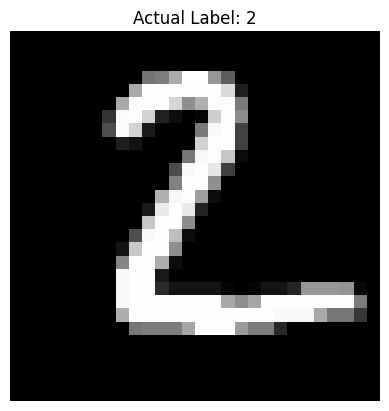

In [39]:
import matplotlib.pyplot as plt

# Pick an index (e.g., 0)
index = 1
image = X_test[index]

# Show the image
plt.imshow(image, cmap='gray')
plt.title(f"Actual Label: {y_test[index]}")
plt.axis('off')
plt.show()
